<a href="https://colab.research.google.com/github/jsroa15/KKBOX/blob/main/Transactions_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transactions data (UNDER CONSTRUCTION)

The main idea here is to explore the transactions dataset.

**Exploratory Data Analysis**

1.  Load data
2.  General statistics
3.  Data Visualization
4.  Data Cleaning
5.  Fixing formats

# **Exploratory Data Analysis**

## 1. Load Data

In [1]:
#Import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Loading data

transactions=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/transactions.csv')

## 2. General Statistics

In [3]:
#Exploring dataset

transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [4]:
#Data types

transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21547746 entries, 0 to 21547745
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   payment_method_id       int64 
 2   payment_plan_days       int64 
 3   plan_list_price         int64 
 4   actual_amount_paid      int64 
 5   is_auto_renew           int64 
 6   transaction_date        int64 
 7   membership_expire_date  int64 
 8   is_cancel               int64 
dtypes: int64(8), object(1)
memory usage: 1.4+ GB


Date features are with the wrong format and categorical features are with numeric formats.

In [5]:
#Shape and unique values
print('Shape of dataset: ',transactions.shape)

print('Amount of unique records: ',transactions.msno.nunique())

Shape of dataset:  (21547746, 9)
Amount of unique records:  2363626


We have duplicated records, which means that we have differente records for every customers. Let's explore one customer.

In [6]:
transactions[transactions['msno']=='YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=']

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
753139,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20151031,20151201,0
1234428,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150630,20150801,0
1917887,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150228,20150401,0
1957479,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20161130,20170101,0
3482816,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150731,20150901,0
5413134,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20160430,20160601,0
7106202,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20160731,20160901,0
7619099,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150131,20150301,0
10161584,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20160831,20161001,0


In [7]:
#Missing Values

pd.DataFrame({'%missing_values':transactions.isna().sum()/transactions.shape[0]})

,%missing_values
msno,0.0
payment_method_id,0.0
payment_plan_days,0.0
plan_list_price,0.0
actual_amount_paid,0.0
is_auto_renew,0.0
transaction_date,0.0
membership_expire_date,0.0
is_cancel,0.0


There are not missing values in the dataset.

## 3. Data Visualization

In [8]:
features=[x for x in transactions.columns if x not in ['msno','transaction_date','membership_expire_date']] 

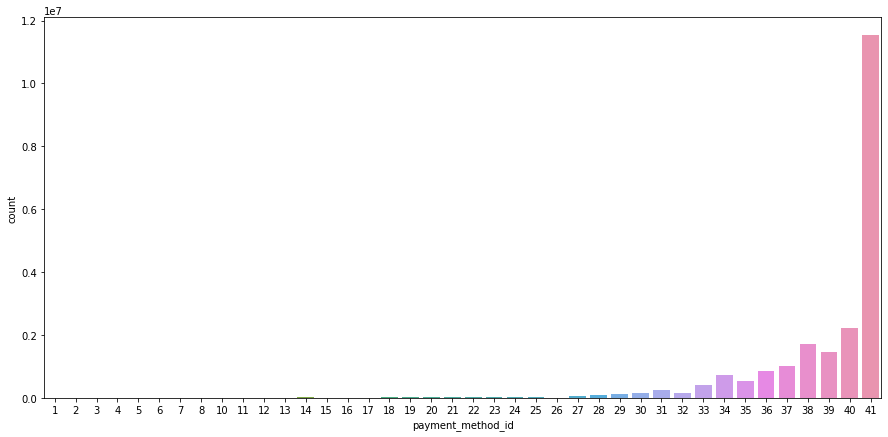

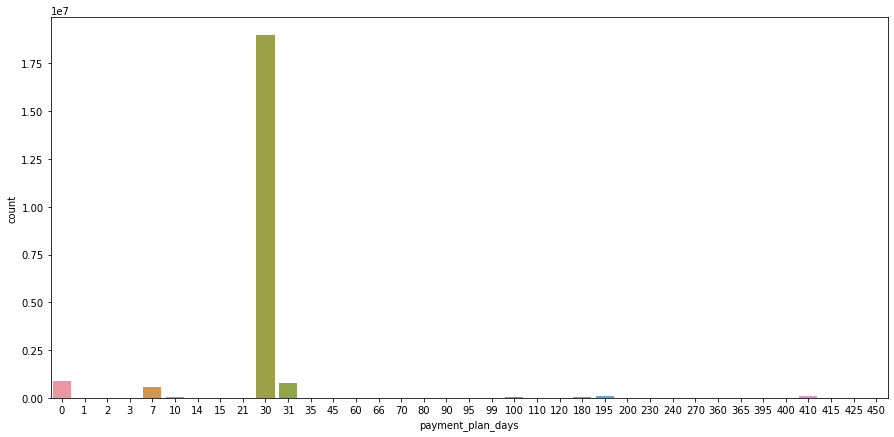

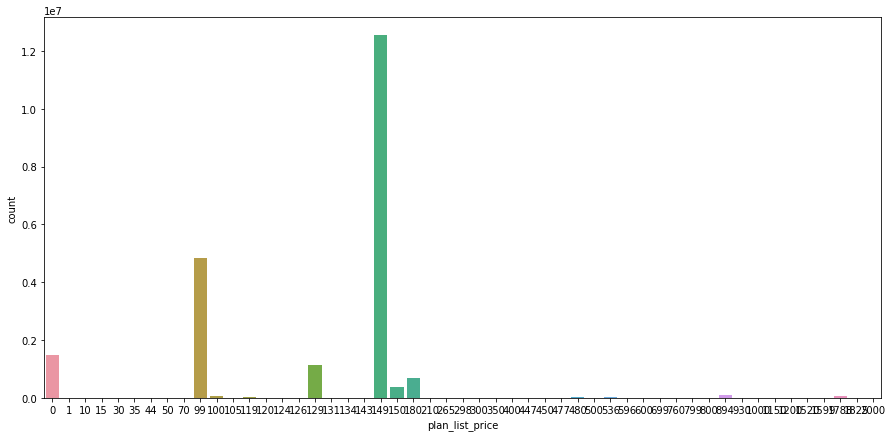

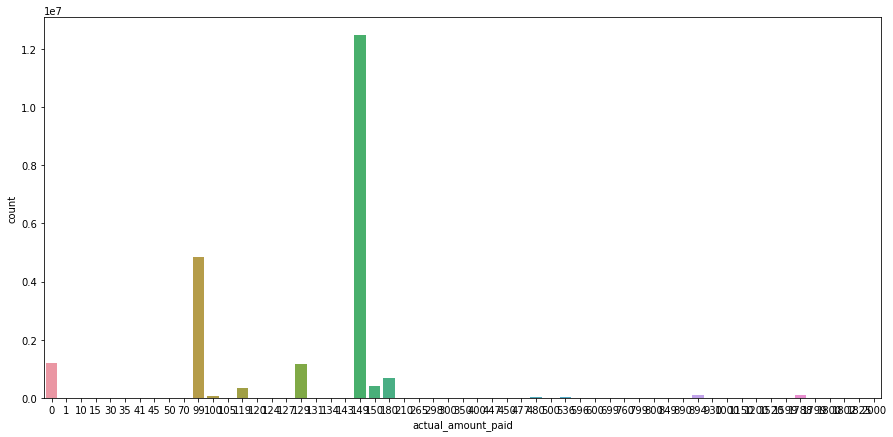

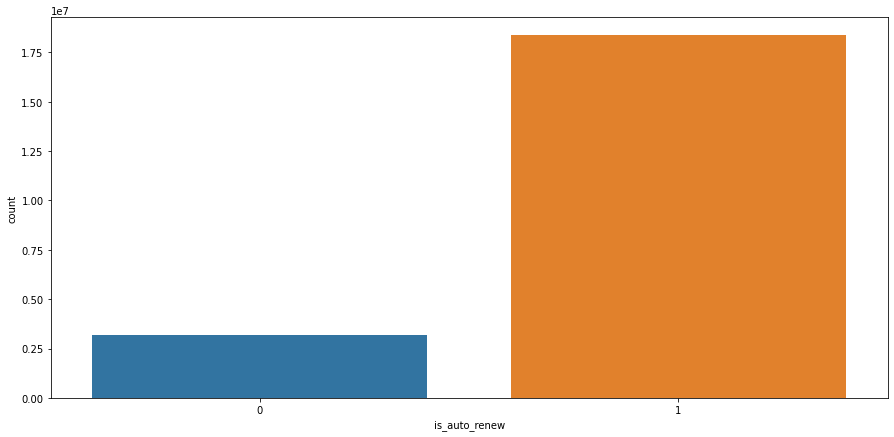

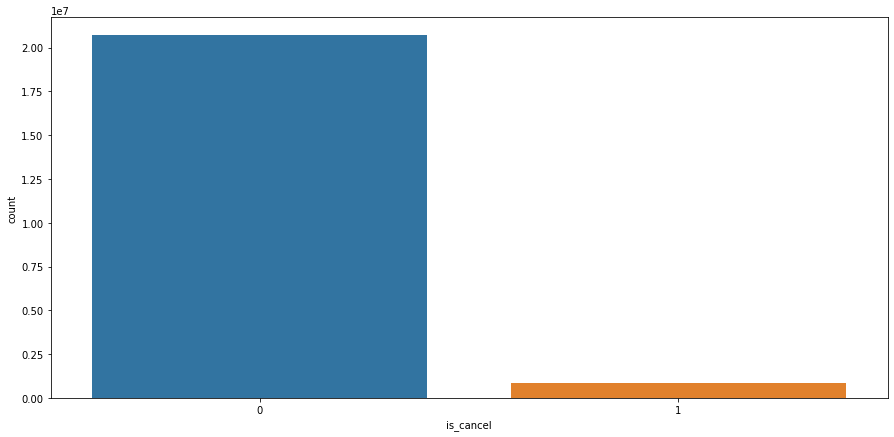

In [9]:

for i in features:
  fig=plt.figure(figsize=(15,7))
  sns.countplot(data=transactions,x=i)
  plt.show()

The previous visualizations show that most of the customers prefer to have a plan of 30 days. Also, cutomers prefer payment method 41 decide to auto-renew the subscription.

More than 90% of customers don't cancel their subscription.

Thare are different options of pricing for subscriptions, but customers prefer to purchase 7 plans.

## 5. Fixing formats

Let's tranform the date features and fix the data type.

In [10]:
transactions['transaction_date']=transactions['transaction_date'].astype('str')
transactions['transaction_date']=pd.to_datetime(transactions['transaction_date'])

transactions['membership_expire_date']=transactions['membership_expire_date'].astype('str')
transactions['membership_expire_date']=pd.to_datetime(transactions['membership_expire_date'])

# **Feature Engineering**

6.  Create new features (Grouping, interactions, binning, extracting dates)
6.  Data Transformation
7.  Outlier detection
8.  Scaling features (optional)
9.  Create a dataframe grouped by user id

With the previous analysis on EDA, we can calculate the number of transactions for each customer

In [11]:
#Number of transactions per customer

temp_transaction_cust=transactions.groupby(['msno']).count()
temp_transaction_cust=temp_transaction_cust.reset_index()

Another feature that we can extract is the most frequent payment_plan_days for each customer.

In [12]:
#Most frequent payment_method_id

temp_payment_cust=transactions.loc[:,['msno','payment_plan_days']]
temp_payment_cust

nose=temp_payment_cust.groupby(['msno'])['payment_plan_days'].agg(lambda x: pd.Series.mode(x)[0])
temp_payment_cust=nose.reset_index()


Now, most frequent temp_payment_method_id

In [13]:
#Most frequent payment id

temp_payment_method_id=transactions.groupby(['msno'])['payment_method_id'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()


We can calculate the total revenue for each customer

In [14]:
#Calculate revenue per customer

revenue=transactions.groupby(['msno'])['actual_amount_paid'].sum().reset_index()


With the feature ```is_auto_renew``` we can calculate the most frequent customer selection and determine if the customer decides to have a auto-renew setup.

In [15]:
auto_renew=transactions.groupby(['msno'])['is_auto_renew'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

We can count the number of cancelations that an user has done before as key feature for our model.

In [16]:
#Number of cancelations per user

cancelations=transactions.groupby(['msno'])['is_cancel'].sum().reset_index()



Now we are gonna explore the day, month, and year in transactions.

In [23]:
transactions['day']=transactions.transaction_date.dt.day_name()

transactions['month']=transactions.transaction_date.dt.month_name()

transactions['year']=transactions.transaction_date.dt.year

transactions['quarter']=transactions.transaction_date.dt.quarter

transactions['quarter_end']=transactions.membership_expire_date.dt.quarter

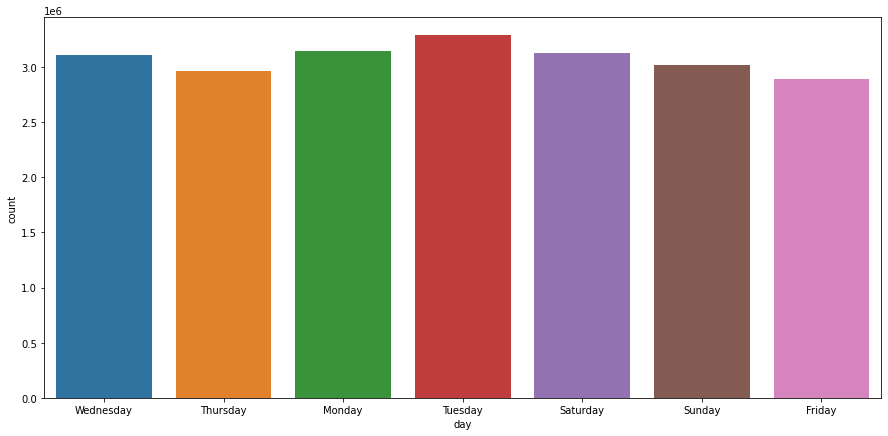

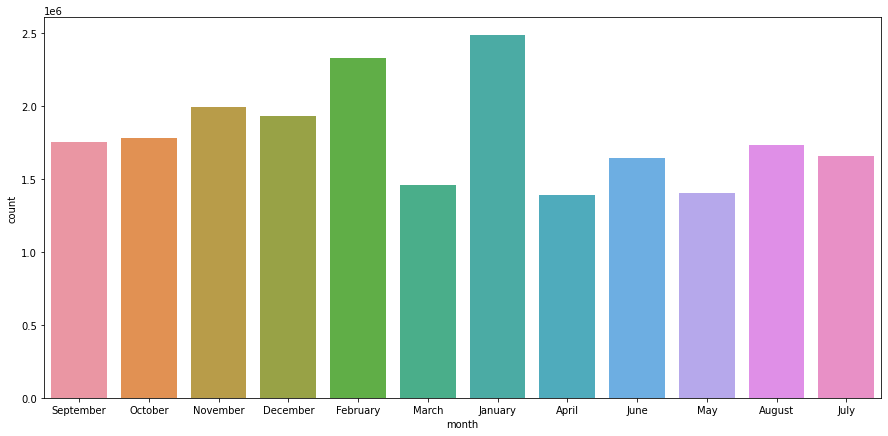

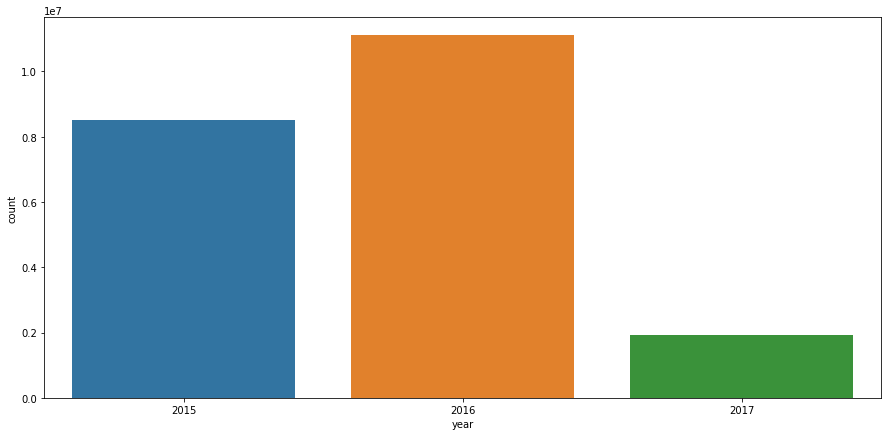

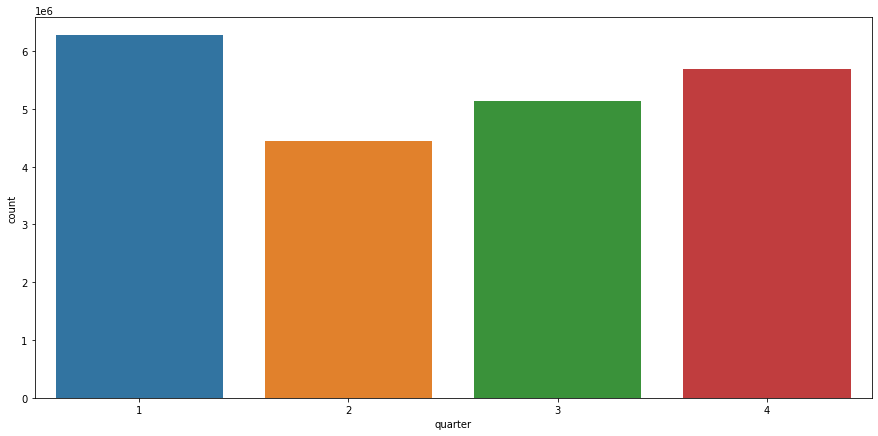

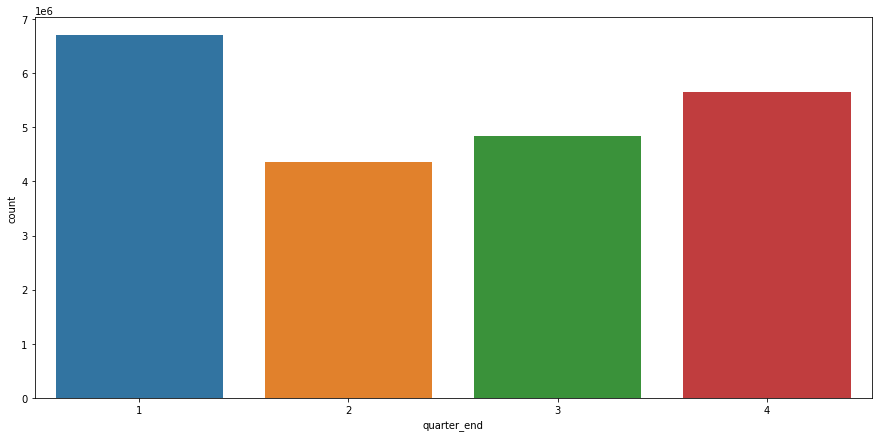

In [24]:
for i in ['day','month','year','quarter','quarter_end']:
  fig=plt.figure(figsize=(15,7))
  sns.countplot(data=transactions,x=i)
  plt.show()

In [17]:
'''#Merging transactions range and df_transactions

df_transactions=df_transactions.merge(transactions_range,how='left')

#Export df_transactions

df_transactions.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_transactions.csv',index=False)

'''

"#Merging transactions range and df_transactions\n\ndf_transactions=df_transactions.merge(transactions_range,how='left')\n\n#Export df_transactions\n\ndf_transactions.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_transactions.csv',index=False)\n\n"